In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
mcdonalds= pd.read_csv('mcdonalds.csv')

## Exploring Data

In [3]:
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
#convert first 11 columns to a numpy array and convert "yes" to 1 and others to 0
MD_x = mcdonalds.iloc[:, :11].map(lambda x: 1 if x == "Yes" else 0)

# Compute column means and round them
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents(55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.

In [6]:
# Principal Component Analysis


from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA
explained_variance = np.cumsum(MD_pca.explained_variance_ratio_)
print(explained_variance)

[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


 Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

In [7]:
explained_variance = pca.explained_variance_ratio_ #pca.explained_variance_ratio_ provides the proportion of variance explained by each principal component.
cumulative_variance = np.cumsum(explained_variance) #np.cumsum(explained_variance) calculates the cumulative sum of explained variance to show how much information is retained as we add more principal components.

# Print summary
print("Standard Deviation:\n", np.sqrt(pca.explained_variance_).round(4)) #converts variance to standard deviation, since PCA in R reports standard deviation instead of variance.
print("\nProportion of Variance:\n", explained_variance.round(4)) #Displays the proportion of total variance explained by each principal component.
print("\nCumulative Proportion:\n", cumulative_variance.round(4)) #Prints the cumulative proportion of variance explained by adding up the components one by one

# Print factor loadings (PCA components)
loadings = pd.DataFrame(pca.components_.T, index=mcdonalds.columns[:11], columns=[f'PC{i+1}' for i in range(11)])
print("\nFactor Loadings:\n", loadings.round(2))

#pca.components_ contains the principal component loadings, which represent how much each original variable contributes to each principal component.

#.T transposes the matrix so that rows represent the original variables, and columns represent the principal components.

# index=mcdonalds.columns[:11] assigns the column names from the original dataset (first 11 columns) as row labels.

# columns=[f'PC{i+1}' for i in range(11)] names the PCA components as PC1, PC2, ..., PC11.

Standard Deviation:
 [0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Proportion of Variance:
 [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion:
 [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]

Factor Loadings:
              PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36 

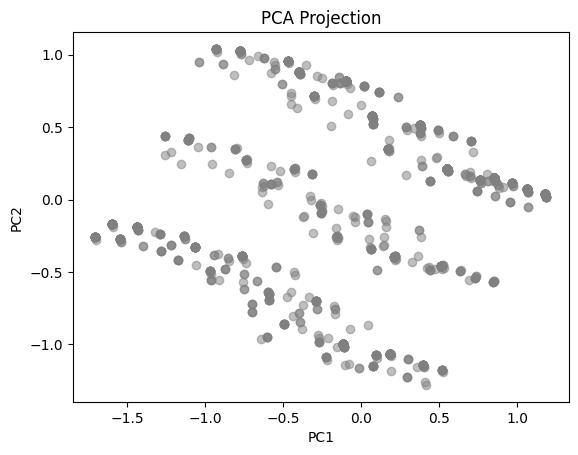

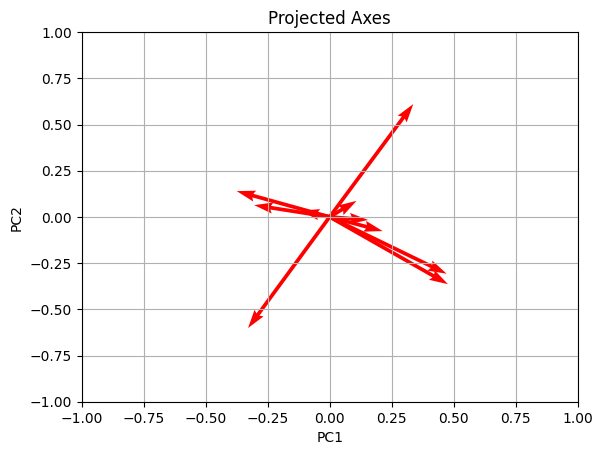

In [8]:
# Assuming PCA is already fitted on MD_x
MD_pca_transformed = pca.transform(MD_x)  # Project data onto principal components

# Plot the PCA projection
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

# Function to project axes
def proj_axes(pca_model):
    components = pca_model.components_  # Principal component vectors
    plt.quiver(np.zeros(components.shape[1]), np.zeros(components.shape[1]),
               components[0, :], components[1, :], angles='xy', scale_units='xy', scale=1, color='red')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Projected Axes")
    plt.grid()
    plt.show()

# Plot projected axes
proj_axes(pca)

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5048\2291578875.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


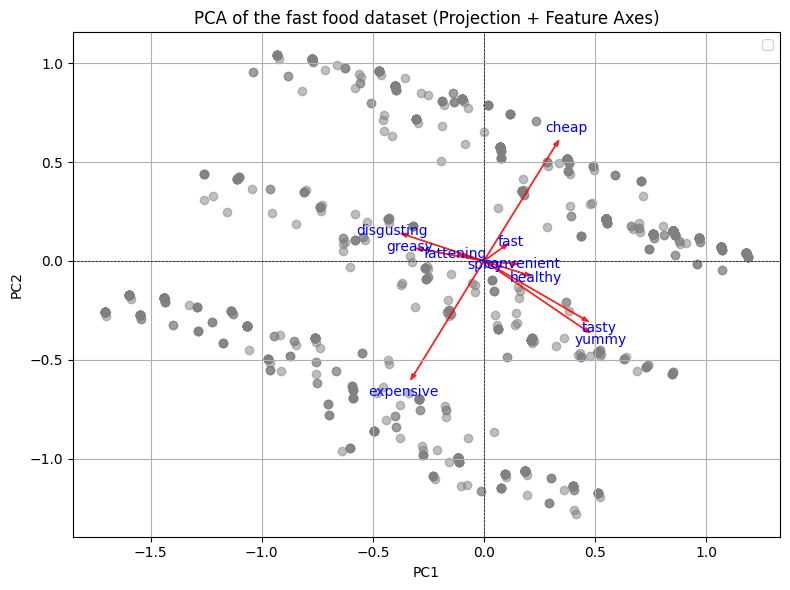

In [9]:
# Assuming PCA is already fitted
MD_pca_transformed = pca.transform(MD_x)

# Get the principal components and feature names
components = pca.components_
feature_names = MD_x.columns  

# Plot the PCA projection (scatter of samples)
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], color='grey', alpha=0.5)

# Plot the projected feature vectors (loadings)
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, feature_names[i], color='blue', ha='center', va='center')

# Aesthetics
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of the fast food dataset (Projection + Feature Axes)")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

 FATTENING, DISGUSTING and GREASY point in the same direction, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY. In the opposite direction are the positive attributes FAST, CONVENIENT, HEALTHY,as well as TASTY and YUMMY. The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to CHEAP, a group of respondents at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents in the middle.


## Extracting Segments

### 1.Using k-Means

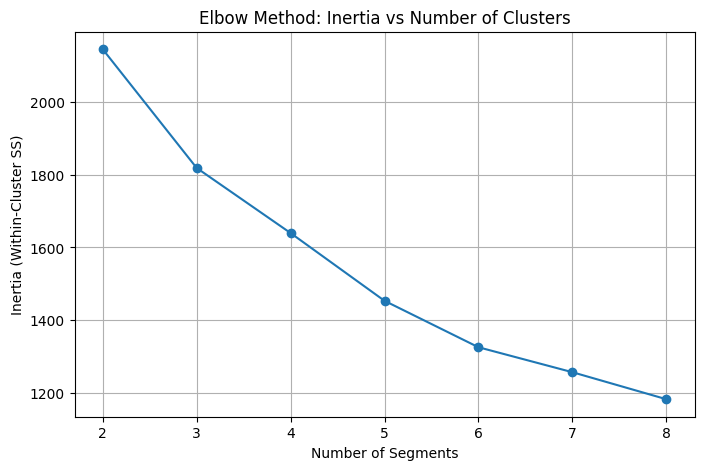

[np.float64(0.24441701827275675), np.float64(0.23915373940875356), np.float64(0.2387149382447963), np.float64(0.2536527756938379), np.float64(0.27500218187982717), np.float64(0.2770508019019034), np.float64(0.28852145695189285)]


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(1234)

X = MD_x.values if hasattr(MD_x, 'values') else MD_x

# Range of k values (number of clusters)
k_values = range(2, 9)
inertias = []
silhouette_scores = []
kmeans_models = {}

# Run KMeans for k in 2:8, with 10 repetitions
for k in k_values:
    best_inertia = np.inf
    best_model = None
    for _ in range(10):  # nrep = 10
        model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(10000))
        model.fit(X)
        if model.inertia_ < best_inertia:
            best_inertia = model.inertia_
            best_model = model
    inertias.append(best_inertia)
    silhouette = silhouette_score(X, best_model.labels_) #Measure how good the clustering is using silhouette score.
    silhouette_scores.append(silhouette) #Store the silhouette score.
    kmeans_models[k] = best_model  #Save the best model for this k.

# Plot Inertia vs Number of Clusters (Elbow plot)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Within-Cluster SS)")
plt.title("Elbow Method: Inertia vs Number of Clusters")
plt.grid(True)
plt.show()

print(silhouette_scores)

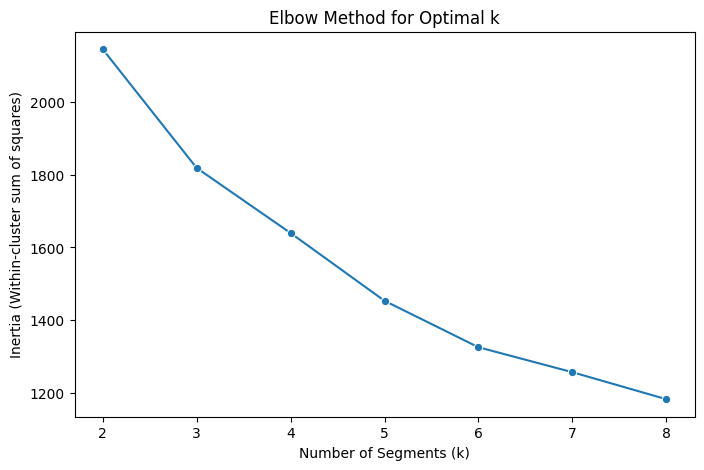

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5048\1036734042.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(labels, bins=best_k, discrete=True, palette="muted")


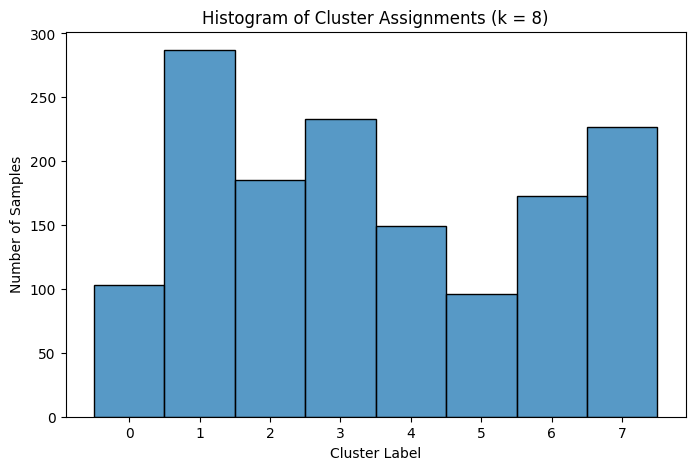

In [11]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Set style and seed
#sns.set(style="whitegrid")
np.random.seed(1234)


#X = MD_x.values if hasattr(MD_x, 'values') else MD_x
k_values = range(2, 9)
inertias = []
silhouette_scores = [] 
best_models = {}

# Step 1: Run KMeans with 10 repetitions per k
for k in k_values:
    best_inertia = np.inf
    best_model = None
    for _ in range(10): #Repeat 10 times to try different random starting points.
        model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(10000))
        model.fit(X)
        if model.inertia_ < best_inertia:
            best_inertia = model.inertia_
            best_model = model
    inertias.append(best_inertia)
    silhouette = silhouette_score(X, best_model.labels_)
    silhouette_scores.append(silhouette)
    best_models[k] = best_model

# Step 2: Elbow plot (Inertia vs K)
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_values), y=inertias, marker='o')
plt.xlabel("Number of Segments (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Step 3: Select best model based on inertia or silhouette
best_k = k_values[np.argmax(silhouette_scores)]  # or use np.argmin(inertias)
final_model = best_models[best_k]
labels = final_model.labels_

# Step 4: Histogram of cluster assignments
plt.figure(figsize=(8, 5))
sns.histplot(labels, bins=best_k, discrete=True, palette="muted")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Samples")
plt.title(f"Histogram of Cluster Assignments (k = {best_k})")
plt.show()

Bootstrapping k = 2
Bootstrapping k = 3
Bootstrapping k = 4
Bootstrapping k = 5
Bootstrapping k = 6
Bootstrapping k = 7
Bootstrapping k = 8


C:\Users\Joyi\AppData\Local\Temp\ipykernel_5048\655283246.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="k", y="Adjusted Rand Index", data=ari_df, palette="Set2")


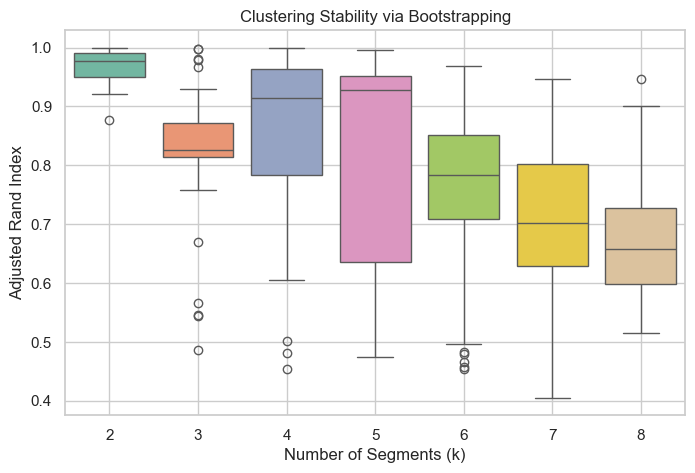

In [12]:

from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Set style and seed
sns.set(style="whitegrid")
np.random.seed(1234)

# Data
X = MD_x.values if hasattr(MD_x, 'values') else MD_x

# Parameters
k_values = range(2, 9)
nrep = 10       # KMeans runs per k to find best model
nboot = 100     # Number of bootstrap samples

# Store ARIs
ari_scores = {k: [] for k in k_values}

# Loop over cluster numbers
for k in k_values:
    print(f"Bootstrapping k = {k}")
    
    # Fit base clustering
    best_model = None
    lowest_inertia = np.inf
    for _ in range(nrep):
        model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(10000))
        model.fit(X)
        if model.inertia_ < lowest_inertia:
            lowest_inertia = model.inertia_
            best_model = model
    base_labels = best_model.labels_

    # Bootstrap loop
    for _ in range(nboot):
        X_boot = resample(X, replace=True, n_samples=X.shape[0], random_state=np.random.randint(10000))
        boot_model = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(10000))
        boot_model.fit(X_boot)

        # Compare full clusterings (approximate stability)
        score = adjusted_rand_score(base_labels, boot_model.predict(X))
        ari_scores[k].append(score)

# Convert ARIs to DataFrame
ari_df = pd.DataFrame([(k, score) for k, scores in ari_scores.items() for score in scores],
                      columns=["k", "Adjusted Rand Index"])

# Boxplot of ARI for each k
plt.figure(figsize=(8, 5))
sns.boxplot(x="k", y="Adjusted Rand Index", data=ari_df, palette="Set2")
plt.xlabel("Number of Segments (k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Stability via Bootstrapping")
plt.grid(True)
plt.show()

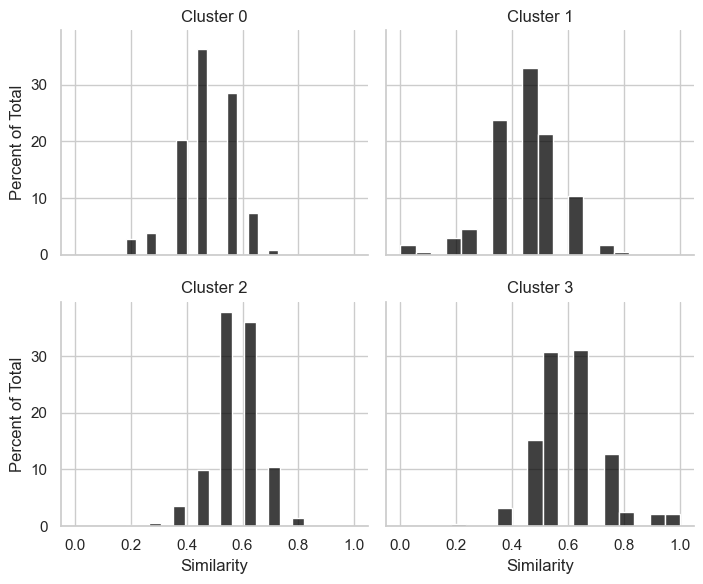

In [13]:
# `model_4` is your trained KMeans (k=4)
k = 4
model_4 = KMeans(n_clusters=k, n_init=10, random_state=1234)
labels_4 = model_4.fit_predict(MD_x)  # Cluster assignments

# Add labels to DataFrame
df = MD_x.copy()
df["cluster"] = labels_4

# Assuming similarity scores are stored in a column, otherwise we can compute them
df["similarity"] = np.mean(df.iloc[:, :-1], axis=1)  # Placeholder: Replace with actual similarity metric

# Create a FacetGrid
g = sns.FacetGrid(df, col="cluster", col_wrap=2, sharex=True, sharey=True, height=3, aspect=1.2)
g.map_dataframe(sns.histplot, x="similarity", bins=15, color="black", stat="percent")

# Adjust labels and layout
g.set_axis_labels("Similarity", "Percent of Total")
g.set_titles(col_template="Cluster {col_name}")
plt.show()

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5048\2296243629.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Stability", data=slsw_df, palette="pastel")


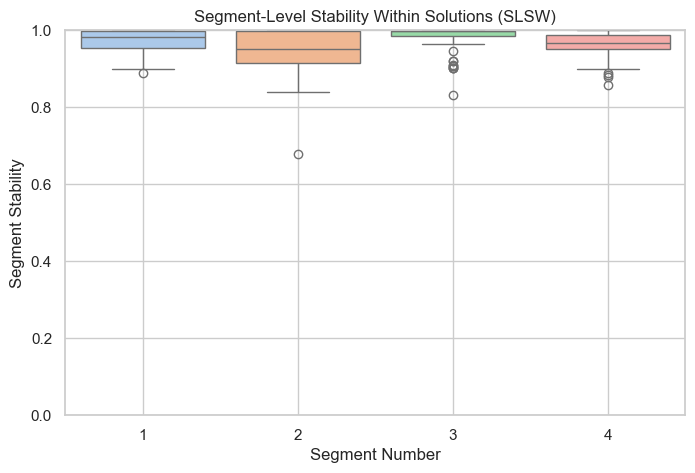

In [14]:
# Set parameters
k = 4
nboot = 100
np.random.seed(42)

# Ensure X is a NumPy array
X = MD_x.values if hasattr(MD_x, 'values') else MD_x

# Fit base model
base_model = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
base_labels = base_model.labels_

# Store stability scores for each segment
segment_scores = {seg_id: [] for seg_id in range(k)}

# Bootstrap loop
for i in range(nboot):
    # Resample the data
    X_boot = resample(X, replace=True, n_samples=X.shape[0], random_state=np.random.randint(10000))
    boot_model = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(10000)).fit(X_boot)
    boot_labels = boot_model.predict(X)

    for seg_id in range(k):
        # Indices of points in this segment in the base model
        original_indices = np.where(base_labels == seg_id)[0]
        if len(original_indices) == 0:
            continue

        # Predicted labels for these points in the boot model
        boot_segment_labels = boot_labels[original_indices]
        majority_label = np.bincount(boot_segment_labels).argmax()

        # Proportion of original segment members still grouped together
        stability_score = np.mean(boot_segment_labels == majority_label)
        segment_scores[seg_id].append(stability_score)

# Convert to DataFrame for plotting
slsw_df = pd.DataFrame({
    "Segment": [seg + 1 for seg in segment_scores for _ in segment_scores[seg]],
    "Stability": [score for seg in segment_scores for score in segment_scores[seg]]
})

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Segment", y="Stability", data=slsw_df, palette="pastel")
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability Within Solutions (SLSW)")
plt.grid(True)
plt.show()


In [15]:
from collections import defaultdict
from scipy.stats import mode

# Suppose MD.x is your dataset (NumPy array or pandas DataFrame)
X = MD_x  # your data

n_clusters = 4
n_bootstraps = 100
random_state = 42

# Step 1: Fit the original model
kmeans_original = KMeans(n_clusters=n_clusters, random_state=random_state)
labels_original = kmeans_original.fit_predict(X)

# Step 2: Initialize container for cluster-wise stability
cluster_stability = defaultdict(list)

# Step 3: Bootstrap and compare
for i in range(n_bootstraps):
    # Resample data with replacement
    indices = np.random.choice(len(X), len(X), replace=True)
    X_resampled = X[indices]

    # Fit k-means on resampled data
    kmeans_boot = KMeans(n_clusters=n_clusters, random_state=random_state + i)
    labels_boot = kmeans_boot.fit_predict(X_resampled)

    # Compare to original using Adjusted Rand Index
    # Get mode label mapping for cluster matching
    mapping = {}
    for c in range(n_clusters):
        original_idx = np.where(labels_original == c)[0]
        if len(original_idx) == 0:
            continue
        resampled_labels = labels_boot[np.isin(indices, original_idx)]
        if len(resampled_labels) == 0:
            continue
        mapped_label = mode(resampled_labels, keepdims=False).mode
        agreement = np.mean(resampled_labels == mapped_label)
        cluster_stability[c].append(agreement)

# Step 4: Average stability per segment
stability_scores = [np.mean(cluster_stability[c]) for c in range(n_clusters)]

# Step 5: Plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, n_clusters + 1), stability_scores)
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Segment-level stability within solutions (SLSW)")
plt.show()

KeyError: "None of [Index([ 883,  197,  981,  751,  143,  608, 1224, 1147,  186, 1349,\n       ...\n        760, 1054,  534,  425, 1417,  671,  362,   81,  355, 1281],\n      dtype='int32', length=1453)] are in the [columns]"

In [ ]:
pip install pomegranate


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:


from pomegranate import GeneralMixtureModel, BernoulliDistribution
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Your binary data matrix
X = MD_x  # make sure it's a NumPy array of 0s and 1s

np.random.seed(1234)

best_models = {}
lowest_bic = np.inf
best_model = None

for k in range(2, 9):  # k from 2 to 8
    bic_scores = []
    models = []

    for rep in range(10):  # nrep = 10
        try:
            # Create a mixture of Bernoulli distributions
            model = GeneralMixtureModel.from_samples(
                BernoulliDistribution,
                n_components=k,
                X=X,
                n_jobs=-1,
                verbose=False
            )
            bic = model.bic(X)
            bic_scores.append(bic)
            models.append(model)

            if bic < lowest_bic:
                lowest_bic = bic
                best_model = model

        except Exception as e:
            print(f"Error for k={k}, rep={rep}: {e}")

    best_models[k] = (min(bic_scores), models[bic_scores.index(min(bic_scores))])

# Summary output
for k in best_models:
    print(f"k={k}, BIC={best_models[k][0]:.2f}")


ImportError: cannot import name 'GeneralMixtureModel' from 'pomegranate' (c:\Users\Joyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pomegranate\__init__.py)

C:\Users\Joyi\AppData\Local\Temp\ipykernel_11240\3819014704.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(1, k + 1)), y=segment_stability, palette="coolwarm")


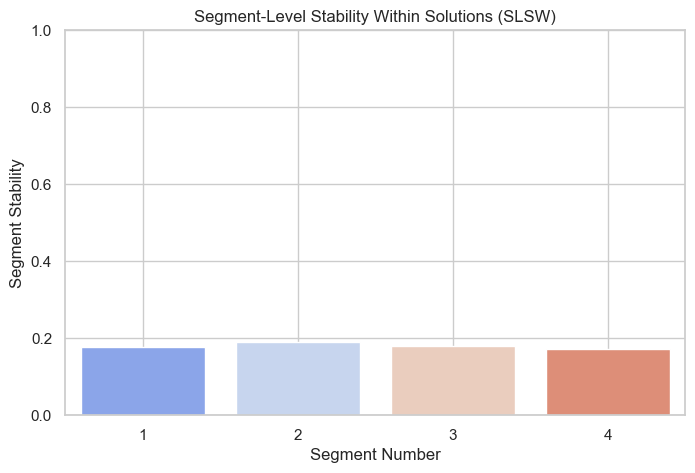

In [ ]:
from scipy.stats import mode

# Parameters
k = 4  # number of clusters
n_rep = 100  # number of runs

# Data
X = MD_x.values if hasattr(MD_x, 'values') else MD_x
n_samples = X.shape[0]

# Store cluster labels from each run
labels_matrix = np.zeros((n_rep, n_samples), dtype=int)

# Repeat KMeans clustering
for i in range(n_rep):
    model = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(10000))
    labels_matrix[i] = model.fit_predict(X)

# Compute segment-level stability
segment_stability = []

# For each cluster number (0 to k-1)
for cluster_id in range(k):
    # Boolean mask for each run: which samples are in this cluster
    membership = (labels_matrix == cluster_id)
    
    # Stability = average consistency across all pairs of runs
    stability_scores = []
    for i in range(n_rep):
        for j in range(i+1, n_rep):
            # Compare sets of points assigned to this cluster in run i and j
            in_i = membership[i]
            in_j = membership[j]
            
            # Stability = Jaccard index: intersection / union
            intersection = np.sum(in_i & in_j)
            union = np.sum(in_i | in_j)
            score = intersection / union if union != 0 else 0
            stability_scores.append(score)
    
    avg_stability = np.mean(stability_scores)
    segment_stability.append(avg_stability)

# Plot the segment-level stability
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, k + 1)), y=segment_stability, palette="coolwarm")
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment-Level Stability Within Solutions (SLSW)")
plt.grid(True)
plt.show()

In [ ]:
import torch
from pomegranate.gmm import GeneralMixtureModel
from pomegranate.distributions import *
from pomegranate import *
#rom pomegranate.distributions import BernoulliDistribution
#from pomegranate import GeneralMixtureModel, BernoulliDistribution
from scipy.stats import bernoulli
from sklearn.metrics import confusion_matrix

In [ ]:
X_bin = (X > 0).astype(int)  # assuming binary-like structure

#Fit Mixture Models from 2 to 8 components
results = []

for k in range(2, 9):
    best_model = None
    best_loglik = -np.inf
    
    # Run multiple times to find best model (like nrep=10)
    for _ in range(10):
        components = [bernoulli.rvs(np.random.rand(X_bin.shape[1])) for _ in range(k)]
        model = GeneralMixtureModel(components)
        model.fit(X_bin, max_iterations=100, verbose=False)
        log_lik = model.log_probability(X_bin).sum()
        
        if log_lik > best_loglik:
            best_loglik = log_lik
            best_model = model
    
    # Compute criteria
    n = X_bin.shape[0]
    d = X_bin.shape[1]
    num_params = k * d + k - 1
    aic = -2 * best_loglik + 2 * num_params
    bic = -2 * best_loglik + np.log(n) * num_params
    icl = bic - np.sum([np.max(p) for p in best_model.predict_proba(X_bin)])  # rough ICL
    
    results.append({
        'k': k,
        'loglik': best_loglik,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl,
        'model': best_model
    })

TypeError: numpy.ndarray is not a Module subclass

In [ ]:
#plot AIC BIC, ICL

df_info = pd.DataFrame([{k: v for k, v in r.items() if k in ['k', 'AIC', 'BIC', 'ICL']} for r in results])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_info, x="k", y="AIC", label="AIC", marker='o')
sns.lineplot(data=df_info, x="k", y="BIC", label="BIC", marker='o')
sns.lineplot(data=df_info, x="k", y="ICL", label="ICL", marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Model Selection using Mixture of Bernoulli Distributions")
plt.grid(True)
plt.show()

In [ ]:
#hoose 4-component model (based on visual or ICL)

model_bernoulli_k4 = next(r['model'] for r in results if r['k'] == 4)
labels_mix = model_bernoulli_k4.predict(X_bin)

# Compare with KMeans

kmeans_k4 = KMeans(n_clusters=4, random_state=1234)
labels_kmeans = kmeans_k4.fit_predict(X)

# Cross-tabulate
conf_matrix = pd.crosstab(pd.Series(labels_kmeans, name="kmeans"),
                          pd.Series(labels_mix, name="mixture"))

print(conf_matrix)

Step 6: Profiling Segments

Profile each segment (cluster) from your k-means model (e.g., k=4).

Use hierarchical clustering to order the variables (attributes) for better visualization.

Plot a segment profile plot — percentage of respondents in each segment associating an attribute with McDonald’s.

Then do a segment separation plot using PCA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, leaves_list 